In [8]:
import randomlogits
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split


X, Y = make_classification(n_samples= 10000, n_features=50, n_redundant=10, n_informative=10,
                           random_state=1, n_clusters_per_class=3, n_repeated = 10)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [3]:
clfrl = randomlogits.TrainRandomLogits(X = X_train, y = y_train, n_logits = 100, n_features = 10)

In [4]:
a, mean_importance_rl, std_importance_rl = randomlogits.GetFeatureImportances(clfrl)

In [5]:
# let's compare it to RFs

clfrf = RandomForestClassifier(n_estimators= 100, max_features = 10, n_jobs=-1)
clfrf.fit(X_train, y_train)
clfrf.feature_importances_

array([ 0.02033336,  0.00533572,  0.0292774 ,  0.03597396,  0.01687007,
        0.04958983,  0.00592465,  0.02149501,  0.01510587,  0.00528543,
        0.01549043,  0.02596944,  0.03276557,  0.02252739,  0.00500365,
        0.00528963,  0.00506764,  0.02223921,  0.01267846,  0.00494682,
        0.00532747,  0.01702785,  0.02483606,  0.00548583,  0.09992362,
        0.0174489 ,  0.02083087,  0.00550397,  0.03811513,  0.02956013,
        0.00564005,  0.00521932,  0.00518984,  0.00493216,  0.02248832,
        0.02257051,  0.01340965,  0.03970713,  0.02577827,  0.02605057,
        0.01949359,  0.02343103,  0.00456829,  0.03968641,  0.094011  ,
        0.00484596,  0.00554784,  0.00576048,  0.0052635 ,  0.00517671])

In [6]:
def plot_feature_importance(mean_importance_array, std_importance_array, indices, label):
    # Print the feature ranking
    print("Ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], mean_importance_array[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title(label)
    plt.bar(range(X.shape[1]), mean_importance_array[indices],
            color="r", yerr=std_importance_array[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

Ranking:
1. feature 24 (-0.555619)
2. feature 44 (0.294989)
3. feature 38 (-0.271826)
4. feature 39 (-0.247773)
5. feature 34 (0.208492)
6. feature 35 (-0.203962)
7. feature 41 (-0.197919)
8. feature 7 (0.182759)
9. feature 5 (0.159641)
10. feature 2 (-0.157674)
11. feature 28 (0.150378)
12. feature 25 (0.140265)
13. feature 22 (-0.130270)
14. feature 36 (0.127572)
15. feature 0 (0.120967)
16. feature 40 (-0.115641)
17. feature 3 (0.113937)
18. feature 11 (0.110226)
19. feature 37 (-0.099986)
20. feature 17 (0.098899)
21. feature 29 (-0.093808)
22. feature 13 (0.093699)
23. feature 43 (0.090731)
24. feature 10 (-0.088707)
25. feature 21 (0.085420)
26. feature 42 (0.064123)
27. feature 4 (0.061300)
28. feature 12 (-0.053974)
29. feature 20 (-0.039782)
30. feature 48 (-0.035070)
31. feature 23 (-0.034492)
32. feature 18 (0.032800)
33. feature 33 (-0.032361)
34. feature 46 (-0.032111)
35. feature 1 (-0.029207)
36. feature 26 (0.023840)
37. feature 19 (-0.023566)
38. feature 14 (-0.022739)

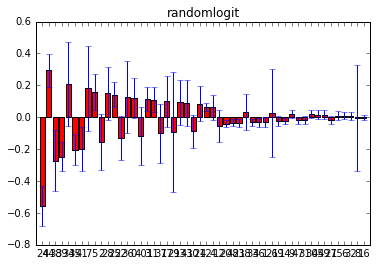

Ranking:
1. feature 24 (0.099924)
2. feature 44 (0.094011)
3. feature 5 (0.049590)
4. feature 37 (0.039707)
5. feature 43 (0.039686)
6. feature 28 (0.038115)
7. feature 3 (0.035974)
8. feature 12 (0.032766)
9. feature 29 (0.029560)
10. feature 2 (0.029277)
11. feature 39 (0.026051)
12. feature 11 (0.025969)
13. feature 38 (0.025778)
14. feature 22 (0.024836)
15. feature 41 (0.023431)
16. feature 35 (0.022571)
17. feature 13 (0.022527)
18. feature 34 (0.022488)
19. feature 17 (0.022239)
20. feature 7 (0.021495)
21. feature 26 (0.020831)
22. feature 0 (0.020333)
23. feature 40 (0.019494)
24. feature 25 (0.017449)
25. feature 21 (0.017028)
26. feature 4 (0.016870)
27. feature 10 (0.015490)
28. feature 8 (0.015106)
29. feature 36 (0.013410)
30. feature 18 (0.012678)
31. feature 6 (0.005925)
32. feature 47 (0.005760)
33. feature 30 (0.005640)
34. feature 46 (0.005548)
35. feature 27 (0.005504)
36. feature 23 (0.005486)
37. feature 1 (0.005336)
38. feature 20 (0.005327)
39. feature 15 (0.005

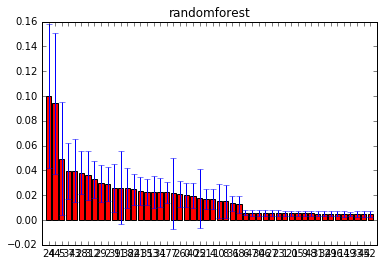

In [9]:
indices_rl = np.argsort(np.abs(mean_importance_rl))[::-1]
# std_important_rl is buggy but will fix it later
plot_feature_importance(mean_importance_rl, std_importance_rl, indices_rl, "randomlogit")

importance_rf = clfrf.feature_importances_
std_importance_rf = np.std([tree.feature_importances_ for tree in clfrf.estimators_],
             axis=0)
indices_rf = np.argsort(importance_rf)[::-1]
plot_feature_importance(importance_rf, std_importance_rf, indices_rf, "randomforest")
